# Table of Contents

# 1. Introduction

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re


# 2. Data Loading and Preprocessing

In [109]:
df = pd.read_csv('raw_data.csv')

# 3. Model Analysis

## Question 1: How many r's are in the word strawberry?

### Deepseek-r1

We assess different model parameters being 1.5B , 7B , 8B , 671B Parameter Model.

We used a zero-shot approach posing the question: "How many r's are in the word strawberry" . Depending on parameter size we sometimes acheived C-O-T processing when answering the question.

In [110]:
# 7 B Model Parameter
df_deepseek_7b = df[df["model_name"] == "deepseek-r1:7b"]
# 1.5 B Model Parameter
df_deepseek_1_5b = df[df["model_name"] == "deepseek-r1:1.5b"]
# 8 B Model Parameter
df_deepseek_8b = df[df["model_name"] == "deepseek-r1:8b"]

#filter for only strawberry prompt
df_deepseek_7b_strawberry = df_deepseek_7b[df_deepseek_7b["prompt"] == "How many r's are in the word strawberry?"]
df_deepseek_1_5b_strawberry = df_deepseek_1_5b[df_deepseek_1_5b["prompt"] == "How many r's are in the word strawberry?"]
df_deepseek_8b_strawberry = df_deepseek_8b[df_deepseek_8b["prompt"] == "How many r's are in the word strawberry?"]

1.5 B Model Parameter

In [111]:
df_deepseek_1_5b_strawberry.head()

,prompt_id,prompt,model_name,iteration_no,average_token_count,min_max_token_variance_%,average_tps,average_inference_time,sample_output,isCorrect
0,4651ffa4-7782-405a-bc59-b975cb9aea67,How many r's are in the word strawberry?,deepseek-r1:1.5b,10,178.7,47.081712,53.166395,3.361146,<think> I need to determine how many times the...,1.0
1,bef53a95-5ffb-4464-8d1e-e59023e5ac4d,How many r's are in the word strawberry?,deepseek-r1:1.5b,10,180.9,67.346939,55.004890,3.288798,<think> To determine how many times the letter...,0.0
5,97b8816a-332d-46ed-b2d3-c10af8f8cd27,How many r's are in the word strawberry?,deepseek-r1:1.5b,10,169.4,64.157706,49.711903,3.407635,<think> I need to determine how many times the...,0.0


In [112]:
df_deepseek_7b_strawberry.head()

,prompt_id,prompt,model_name,iteration_no,average_token_count,min_max_token_variance_%,average_tps,average_inference_time,sample_output,isCorrect
2,871b3db4-ee84-409c-9695-8c893f0ca641,How many r's are in the word strawberry?,deepseek-r1:7b,10,251.2,84.832905,16.011677,15.688550,"<think> Alright, so I need to figure out how m...",0.0
3,9f1e1314-1aa3-48db-8a73-f8b2825254a6,How many r's are in the word strawberry?,deepseek-r1:7b,10,301.4,88.957597,15.625985,19.288384,<think> To determine how many times the letter...,0.0
4,8c184f47-b203-4759-90b3-1150761ee924,How many r's are in the word strawberry?,deepseek-r1:7b,10,296.3,85.940410,16.213668,18.274705,"<think> Okay, so I need to figure out how many...",1.0


In [113]:
df_deepseek_8b_strawberry.head()

,prompt_id,prompt,model_name,iteration_no,average_token_count,min_max_token_variance_%,average_tps,average_inference_time,sample_output,isCorrect
6,edd003d1-2604-405a-b8e3-5594a0f8f8af,How many r's are in the word strawberry?,deepseek-r1:8b,10,197.4,64.156627,14.162464,13.938253,<think> To determine how many times the letter...,1.0
7,926b3667-bc1f-4a6c-9d1c-0ac371041fcd,How many r's are in the word strawberry?,deepseek-r1:8b,10,186.4,78.584392,14.076665,13.241773,<think> To determine how many times the letter...,NaN


### Models Evalutation

Analyzing Deepseek 1.5B model:

Analyzing Deepseek 7B model:

Analyzing Deepseek 8B model:

Comprehensive Model Comparison:


,count,avg_processing_time,min_processing_time,max_processing_time,accuracy_rate,cot_usage_rate,avg_token_count,avg_tokens_per_second
Deepseek 1.5B,3.0,3.352526,3.288798,3.407635,33.333333,100.0,176.333333,52.627729
Deepseek 7B,3.0,17.750546,15.688550,19.288384,33.333333,100.0,282.966667,15.950443
Deepseek 8B,2.0,13.590013,13.241773,13.938253,100.000000,100.0,191.900000,14.119564


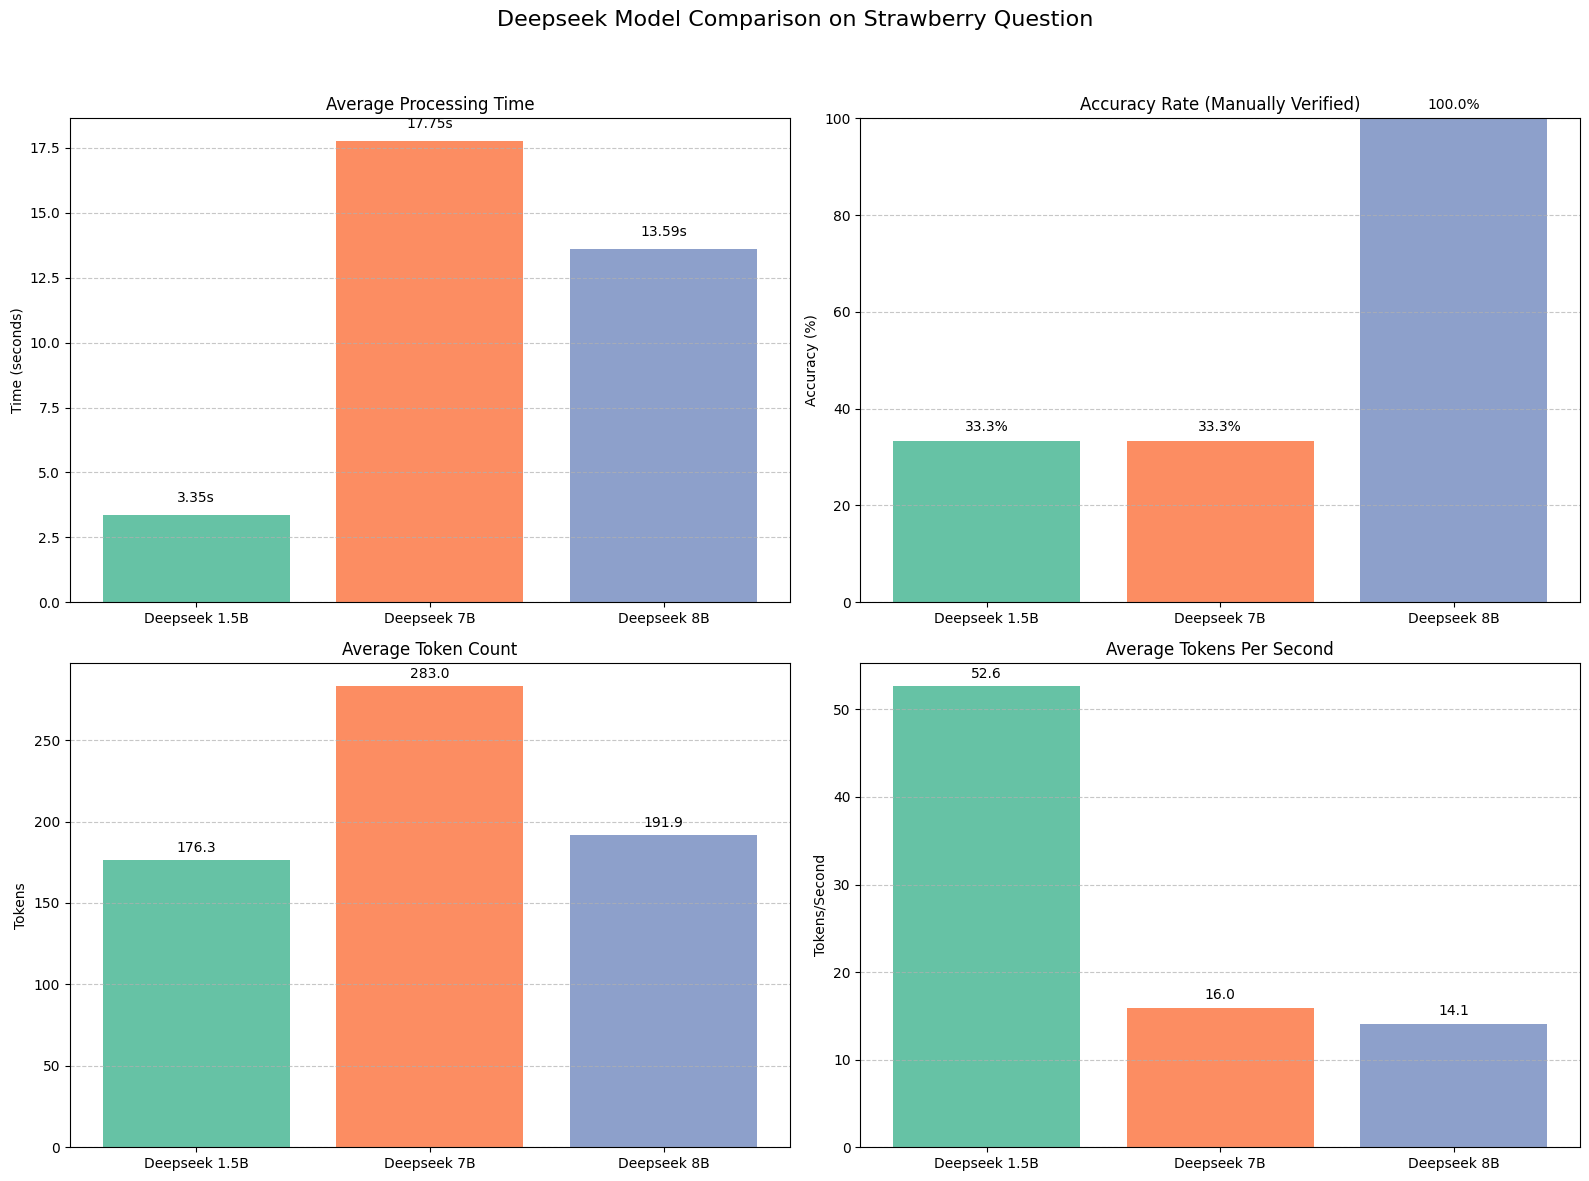

Summary of Deepseek Models Performance:


,Parameter Size,Avg Processing Time (s),Avg Token Count,Tokens/Second,Accuracy (%),CoT Usage (%),Sample Count
Model,,,,,,,
Deepseek 1.5B,1.5B,3.352526,176.333333,52.627729,33.333333,100.0,3
Deepseek 7B,7B,17.750546,282.966667,15.950443,33.333333,100.0,3
Deepseek 8B,8B,13.590013,191.900000,14.119564,100.000000,100.0,2


,Parameter Size,Avg Processing Time (s),Avg Token Count,Tokens/Second,Accuracy (%),CoT Usage (%),Sample Count,Efficiency (Accuracy/Time),Weighted Efficiency
Model,,,,,,,,,
Deepseek 1.5B,1.5B,3.352526,176.333333,52.627729,33.333333,100.0,3,9.942751,17.542576
Deepseek 7B,7B,17.750546,282.966667,15.950443,33.333333,100.0,3,1.877876,5.316814
Deepseek 8B,8B,13.590013,191.900000,14.119564,100.000000,100.0,2,7.358345,14.119564


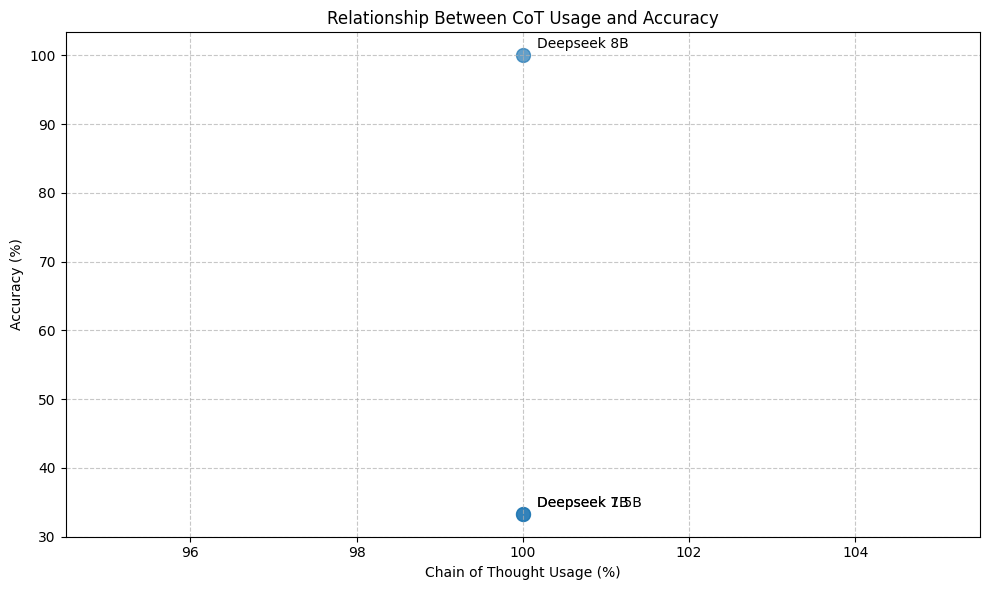

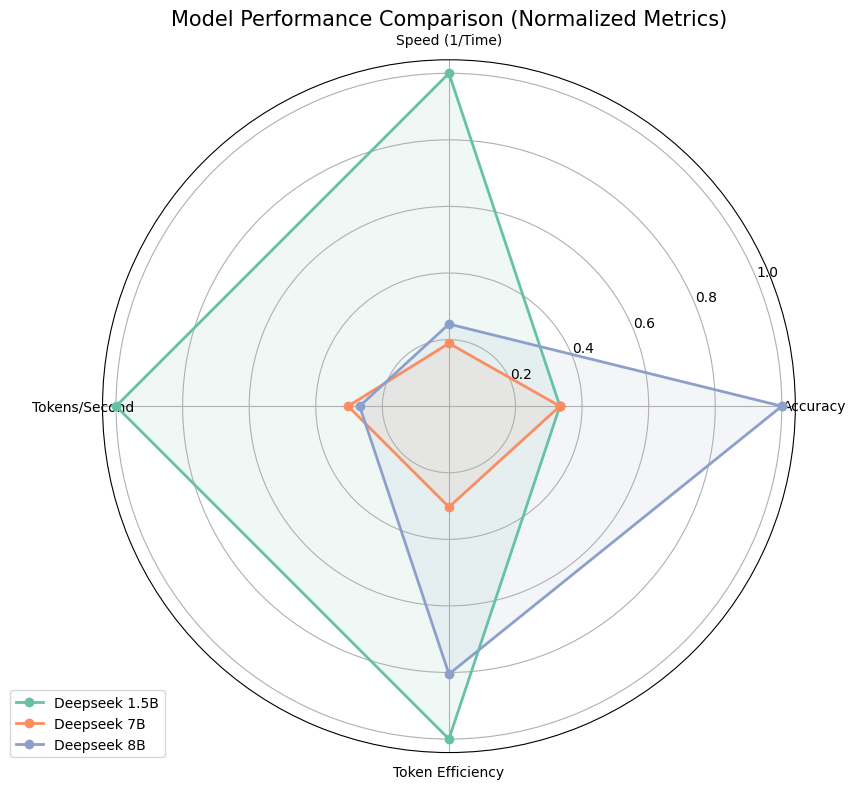

In [114]:
# Extract relevant statistics from each dataframe
def extract_stats(df):
    # Count samples
    count = len(df)
    
    # Processing time statistics from 'average_inference_time' column
    avg_processing_time = df['average_inference_time'].mean()
    min_processing_time = df['average_inference_time'].min()
    max_processing_time = df['average_inference_time'].max()
    
    # Accuracy statistics from the manually added isCorrect column
    accuracy_rate = df['isCorrect'].mean() * 100
    
    # Check for Chain of Thought reasoning (indicated by "<think>" tag)
    df['used_cot'] = df['sample_output'].str.contains('<think>', case=False)
    cot_usage_rate = df['used_cot'].mean() * 100
    
    # Token statistics
    avg_token_count = df['average_token_count'].mean()
    avg_tokens_per_second = df['average_tps'].mean()
    
    return {
        'count': count,
        'avg_processing_time': avg_processing_time,
        'min_processing_time': min_processing_time,
        'max_processing_time': max_processing_time,
        'accuracy_rate': accuracy_rate,
        'cot_usage_rate': cot_usage_rate,
        'avg_token_count': avg_token_count,
        'avg_tokens_per_second': avg_tokens_per_second
    }

# Get statistics for each model
print("Analyzing Deepseek 1.5B model:")
stats_1_5b = extract_stats(df_deepseek_1_5b_strawberry)

print("\nAnalyzing Deepseek 7B model:")
stats_7b = extract_stats(df_deepseek_7b_strawberry)

print("\nAnalyzing Deepseek 8B model:")
stats_8b = extract_stats(df_deepseek_8b_strawberry)

# Create a comparison dataframe with all statistics
comparison_df = pd.DataFrame({
    'Deepseek 1.5B': stats_1_5b,
    'Deepseek 7B': stats_7b,
    'Deepseek 8B': stats_8b
}).T

# Display the full comparison table
print("\nComprehensive Model Comparison:")
display(comparison_df)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Deepseek Model Comparison on Strawberry Question', fontsize=16)

# Models for all charts
models = ['Deepseek 1.5B', 'Deepseek 7B', 'Deepseek 8B']

# 1. Processing Time Comparison
axes[0, 0].bar(models, 
              [stats_1_5b['avg_processing_time'], stats_7b['avg_processing_time'], stats_8b['avg_processing_time']], 
              color=['#66c2a5', '#fc8d62', '#8da0cb'])
axes[0, 0].set_title('Average Processing Time')
axes[0, 0].set_ylabel('Time (seconds)')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate([stats_1_5b['avg_processing_time'], stats_7b['avg_processing_time'], stats_8b['avg_processing_time']]):
    axes[0, 0].text(i, v + 0.5, f'{v:.2f}s', ha='center')

# 2. Accuracy Rate Comparison (using manually added isCorrect column)
axes[0, 1].bar(models, 
              [stats_1_5b['accuracy_rate'], stats_7b['accuracy_rate'], stats_8b['accuracy_rate']], 
              color=['#66c2a5', '#fc8d62', '#8da0cb'])
axes[0, 1].set_title('Accuracy Rate (Manually Verified)')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].set_ylim(0, 100)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate([stats_1_5b['accuracy_rate'], stats_7b['accuracy_rate'], stats_8b['accuracy_rate']]):
    axes[0, 1].text(i, v + 2, f'{v:.1f}%', ha='center')

# 3. Token Count Comparison
axes[1, 0].bar(models, 
              [stats_1_5b['avg_token_count'], stats_7b['avg_token_count'], stats_8b['avg_token_count']], 
              color=['#66c2a5', '#fc8d62', '#8da0cb'])
axes[1, 0].set_title('Average Token Count')
axes[1, 0].set_ylabel('Tokens')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate([stats_1_5b['avg_token_count'], stats_7b['avg_token_count'], stats_8b['avg_token_count']]):
    axes[1, 0].text(i, v + 5, f'{v:.1f}', ha='center')

# 4. Tokens Per Second Comparison
axes[1, 1].bar(models, 
              [stats_1_5b['avg_tokens_per_second'], stats_7b['avg_tokens_per_second'], stats_8b['avg_tokens_per_second']], 
              color=['#66c2a5', '#fc8d62', '#8da0cb'])
axes[1, 1].set_title('Average Tokens Per Second')
axes[1, 1].set_ylabel('Tokens/Second')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate([stats_1_5b['avg_tokens_per_second'], stats_7b['avg_tokens_per_second'], stats_8b['avg_tokens_per_second']]):
    axes[1, 1].text(i, v + 1, f'{v:.1f}', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Create a summary table with key findings
summary_data = {
    'Model': models,
    'Parameter Size': ['1.5B', '7B', '8B'],
    'Avg Processing Time (s)': [stats_1_5b['avg_processing_time'], stats_7b['avg_processing_time'], stats_8b['avg_processing_time']],
    'Avg Token Count': [stats_1_5b['avg_token_count'], stats_7b['avg_token_count'], stats_8b['avg_token_count']],
    'Tokens/Second': [stats_1_5b['avg_tokens_per_second'], stats_7b['avg_tokens_per_second'], stats_8b['avg_tokens_per_second']],
    'Accuracy (%)': [stats_1_5b['accuracy_rate'], stats_7b['accuracy_rate'], stats_8b['accuracy_rate']],
    'CoT Usage (%)': [stats_1_5b['cot_usage_rate'], stats_7b['cot_usage_rate'], stats_8b['cot_usage_rate']],
    'Sample Count': [stats_1_5b['count'], stats_7b['count'], stats_8b['count']]
}

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Parameter Size')
summary_df.set_index('Model', inplace=True)

print("Summary of Deepseek Models Performance:")
display(summary_df)

# Calculate efficiency metrics
summary_df['Efficiency (Accuracy/Time)'] = summary_df['Accuracy (%)'] / summary_df['Avg Processing Time (s)']
summary_df['Weighted Efficiency'] = summary_df['Tokens/Second'] * (summary_df['Accuracy (%)']/100)
display(summary_df)

# Create a correlation between accuracy and CoT usage
plt.figure(figsize=(10, 6))
plt.scatter([stats_1_5b['cot_usage_rate'], stats_7b['cot_usage_rate'], stats_8b['cot_usage_rate']],
           [stats_1_5b['accuracy_rate'], stats_7b['accuracy_rate'], stats_8b['accuracy_rate']],
           s=100, alpha=0.7)

# Add labels for each point
for i, model in enumerate(models):
    plt.annotate(model, 
                ([stats_1_5b['cot_usage_rate'], stats_7b['cot_usage_rate'], stats_8b['cot_usage_rate']][i],
                 [stats_1_5b['accuracy_rate'], stats_7b['accuracy_rate'], stats_8b['accuracy_rate']][i]),
                xytext=(10, 5), textcoords='offset points')

plt.title('Relationship Between CoT Usage and Accuracy')
plt.xlabel('Chain of Thought Usage (%)')
plt.ylabel('Accuracy (%)')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a radar chart for comparing models across multiple dimensions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

# Define the metrics to include in the radar chart
metrics = ['Accuracy', 'Speed (1/Time)', 'Tokens/Second', 'Token Efficiency']

# Normalize the data for radar chart (0-1 scale)
max_accuracy = max(stats_1_5b['accuracy_rate'], stats_7b['accuracy_rate'], stats_8b['accuracy_rate'])
max_speed = 1/min(stats_1_5b['avg_processing_time'], stats_7b['avg_processing_time'], stats_8b['avg_processing_time'])
max_tps = max(stats_1_5b['avg_tokens_per_second'], stats_7b['avg_tokens_per_second'], stats_8b['avg_tokens_per_second'])
max_efficiency = max(summary_df['Weighted Efficiency'])

radar_data = {
    'Deepseek 1.5B': [
        stats_1_5b['accuracy_rate']/max_accuracy,
        (1/stats_1_5b['avg_processing_time'])/max_speed,
        stats_1_5b['avg_tokens_per_second']/max_tps,
        summary_df.loc['Deepseek 1.5B', 'Weighted Efficiency']/max_efficiency
    ],
    'Deepseek 7B': [
        stats_7b['accuracy_rate']/max_accuracy,
        (1/stats_7b['avg_processing_time'])/max_speed,
        stats_7b['avg_tokens_per_second']/max_tps,
        summary_df.loc['Deepseek 7B', 'Weighted Efficiency']/max_efficiency
    ],
    'Deepseek 8B': [
        stats_8b['accuracy_rate']/max_accuracy,
        (1/stats_8b['avg_processing_time'])/max_speed,
        stats_8b['avg_tokens_per_second']/max_tps,
        summary_df.loc['Deepseek 8B', 'Weighted Efficiency']/max_efficiency
    ]
}

# Set up the angles for each metric
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Add metrics to the plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Plot each model
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
for i, model in enumerate(models):
    values = radar_data[model]
    values += values[:1]  # Close the loop
    ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=model)
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Model Performance Comparison (Normalized Metrics)', size=15)
plt.tight_layout()
plt.show()